## House Price Prediction Using Machine Learning

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
house = pd.read_csv(r"C:\Users\aksha\OneDrive\Documents\PYTHON\Datasets\housing.csv")
house.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

house = pd.read_csv(r"C:\Users\aksha\OneDrive\Documents\PYTHON\Datasets\housing.csv",header=None, delimiter=r"\s+",names=column_names)
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# No. of Rows and Columns

house.shape

(506, 14)

In [5]:
# To check Null values

house.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

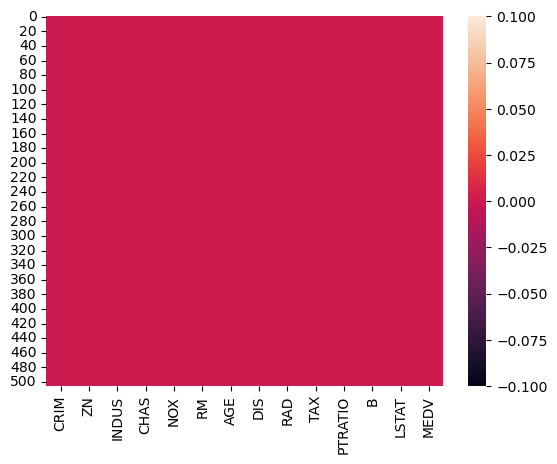

In [6]:
sns.heatmap(house.isnull())
plt.show()

In [7]:
house.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [8]:
house.duplicated().sum()

0

In [9]:
x = house.drop('MEDV',axis=1)
y = house['MEDV']

In [10]:
# Splitting our data / Train Test Split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In [11]:
# Apply Scaling

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [12]:
# Shape of x_train, x_test

x_train.shape,x_test.shape

((354, 13), (152, 13))

In [13]:
# Creating a Neural Network (ANN)

# Using Inbuilt class Sequential which is defined in tensorflow.keras

# Creating Object of Sequential class

model = tf.keras.Sequential([
    # first hidden layer
    tf.keras.layers.Dense(units=14,activation='relu',input_shape=(13,)),
    # Output layer
    tf.keras.layers.Dense(units=1,activation='linear')
])

In [14]:
# To show summary of our model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                196       
                                                                 
 dense_1 (Dense)             (None, 1)                 15        
                                                                 
Total params: 211 (844.00 Byte)
Trainable params: 211 (844.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Compile our Model

model.compile(optimizer='sgd',loss='mse')

In [16]:
# Creating a procedure to decide the no. of epochs to train the model (EarlyStopping)

from tensorflow.keras.callbacks import EarlyStopping

# create object for EarlyStopping class
cb = EarlyStopping(
    monitor = 'val_loss',   # testing error
    min_delta = 0.00001,    # min value of delta
    patience = 20,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

In [17]:
# Train our model, fit()

trained_model = model.fit(x_train,y_train,callbacks=cb,epochs=5000,validation_data=(x_test,y_test))     # trained_model holds value of loss for each epoch(iteration)

Epoch 1/5000

12/12 [==============================] - 1s 21ms/step - loss: 166.9018 - val_loss: 33.2259
Epoch 2/5000
12/12 [==============================] - 0s 5ms/step - loss: 30.5249 - val_loss: 37.8504
Epoch 3/5000
12/12 [==============================] - 0s 5ms/step - loss: 25.9132 - val_loss: 83.6451
Epoch 4/5000
12/12 [==============================] - 0s 6ms/step - loss: 32.1099 - val_loss: 16.5142
Epoch 5/5000
12/12 [==============================] - 0s 6ms/step - loss: 19.4020 - val_loss: 13.9796
Epoch 6/5000
12/12 [==============================] - 0s 6ms/step - loss: 17.3277 - val_loss: 36.1651
Epoch 7/5000
12/12 [==============================] - 0s 6ms/step - loss: 19.2457 - val_loss: 48.5194
Epoch 8/5000
12/12 [==============================] - 0s 5ms/step - loss: 22.9322 - val_loss: 22.8619
Epoch 9/5000
12/12 [==============================] - 0s 6ms/step - loss: 16.9891 - val_loss: 33.7123
Epoch 10/5000
12/12 [==============================] - 0s 6ms/step - loss: 17.3

In [18]:
# Checking Training and Testing loss (This is the last iteration from above where our model stopped)

print('Training_loss :',model.evaluate(x_train,y_train))
print('Testing_loss :',model.evaluate(x_test,y_test))

12/12 [==============================] - 0s 2ms/step - loss: 9.1904
Training_loss : 9.190410614013672
5/5 [==============================] - 0s 3ms/step - loss: 9.1775
Testing_loss : 9.17752456665039


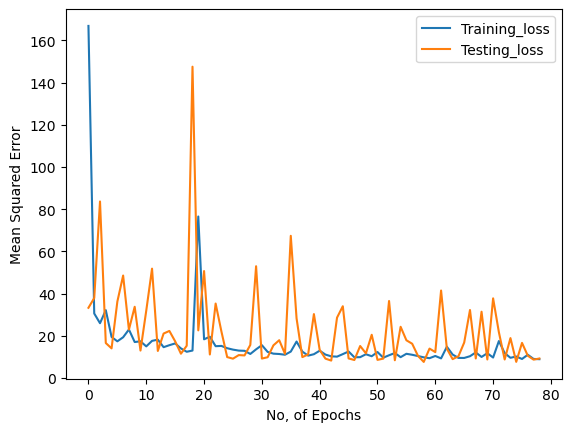

In [19]:
# Visualizing loss and epochs of  each iteration

plt.plot(trained_model.history['loss'],label='Training_loss')
plt.plot(trained_model.history['val_loss'],label='Testing_loss')
plt.xlabel('No, of Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [20]:
# Test the model (prediction)

Y_pred = model.predict(x_test)

5/5 [==============================] - 0s 4ms/step


In [21]:
# Check the r2_score (accuracy)

from sklearn.metrics import r2_score
print(r2_score(y_test,Y_pred))

0.8998682370863924
